In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
stunting_df = pd.read_csv('/content/drive/MyDrive/Laskar Ai/dataset_stunting.csv')
stunting_df.head()

,pid14,hhid14,pidlink,sex,birth_day,birth_mth,birth_yr,birth_date,age_months,weight,...,nasi_week,manis_week,modeweight,modeheight,modebrtweight,modeasi,modeprenat,_agedays,haz,stunting_status
0,10,2241400,224140010,2,19,11,2014,19nov2014,1,7.3,...,7,7,10,85,3,24,9,30,5.055487,Normal
1,4,3021751,302175104,1,13,11,2014,13nov2014,1,6.8,...,2,0,10,85,3,24,9,30,4.745789,Normal
2,3,1830151,183015103,1,21,11,2014,21nov2014,1,4.3,...,0,0,10,85,3,24,9,30,1.878058,Normal
3,4,3201051,320105104,1,20,11,2014,20nov2014,1,7.1,...,0,0,10,85,3,24,9,30,5.616351,Normal
4,19,2720700,272070019,2,1,11,2014,01nov2014,1,5.3,...,0,0,10,85,3,24,9,30,2.082895,Normal


## Preprocessing Data

In [ ]:
# Menghapus variabel yang tidak diperlukan

stunting_df = stunting_df.drop(columns=['modeweight', 'modeheight', 'modebrtweight', 'modeasi', 'modeprenat', 'pid14', 'hhid14', 'pidlink', 'mergekey'])
stunting_df.head()

,sex,birth_day,birth_mth,birth_yr,birth_date,age_months,weight,height,postnatal,birth_weight,...,mie_week,fastf_week,soda_week,sambal_week,gorengan_week,nasi_week,manis_week,_agedays,haz,stunting_status
0,2,19,11,2014,19nov2014,1,7.3,64.5,No,2.7,...,0,0,0,0,0,7,7,30,5.055487,Normal
1,1,13,11,2014,13nov2014,1,6.8,62.9,No,2.6,...,0,0,0,0,0,2,0,30,4.745789,Normal
2,1,21,11,2014,21nov2014,1,4.3,57.3,No,3.5,...,0,0,0,0,0,0,0,30,1.878058,Normal
3,1,20,11,2014,20nov2014,1,7.1,64.6,No,3.0,...,0,0,0,0,0,0,0,30,5.616351,Normal
4,2,1,11,2014,01nov2014,1,5.3,57.7,No,3.5,...,0,0,0,0,0,0,0,30,2.082895,Normal


In [ ]:
# Mengubah tipe data

cols_to_convert = ['ubi_week', 'telur_week', 'ikan_week', 'daging_week', 'susu_week', 'sayur_week', 'pisang_week', 'wortel_week', 'mie_week', 'fastf_week', 'soda_week', 'sambal_week', 'gorengan_week', 'nasi_week', 'manis_week']
for col in cols_to_convert:
    stunting_df[col] = pd.to_numeric(stunting_df[col], errors='coerce').fillna(0).astype(int)

In [ ]:
stunting_df['sex'] = stunting_df['sex'].map({1: 'Laki-laki', 2: 'Perempuan'}).astype('category')

In [ ]:
stunting_df['birth_date'] = pd.to_datetime(stunting_df['birth_date'])

<ipython-input-9-60cf9c825bf4>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  stunting_df['birth_date'] = pd.to_datetime(stunting_df['birth_date'])


In [ ]:
stunting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4526 entries, 0 to 4525
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   sex              4526 non-null   category      
 1   birth_day        4526 non-null   int64         
 2   birth_mth        4526 non-null   int64         
 3   birth_yr         4526 non-null   int64         
 4   birth_date       4526 non-null   datetime64[ns]
 5   age_months       4526 non-null   int64         
 6   weight           4526 non-null   float64       
 7   height           4526 non-null   float64       
 8   postnatal        4526 non-null   object        
 9   birth_weight     4526 non-null   float64       
 10  asi              4526 non-null   int64         
 11  prenatal         4526 non-null   int64         
 12  ubi_week         4526 non-null   int64         
 13  telur_week       4526 non-null   int64         
 14  ikan_week        4526 non-null   int64  

In [ ]:
# Memastikan ketiadaan missing values
stunting_df.isna().sum()

,0
sex,0
birth_day,0
birth_mth,0
birth_yr,0
birth_date,0
age_months,0
weight,0
height,0
postnatal,0
birth_weight,0


In [ ]:
# Menampilkan statistik deskriptif dari dataset untuk kolom numerik
stunting_df.describe()

,birth_day,birth_mth,birth_yr,birth_date,age_months,weight,height,birth_weight,asi,prenatal,...,mangga_week,mie_week,fastf_week,soda_week,sambal_week,gorengan_week,nasi_week,manis_week,_agedays,haz
count,4526.000000,4526.000000,4526.000000,4526,4526.000000,4526.000000,4526.000000,4526.000000,4526.000000,4526.000000,...,4526.000000,4526.000000,4526.000000,4526.000000,4526.000000,4526.000000,4526.000000,4526.000000,4526.000000,4526.000000
mean,15.452055,6.327883,2011.846664,2012-04-30 06:04:17.711003136,31.512152,12.018891,86.711357,3.154821,18.726248,8.341582,...,0.705921,1.503093,0.342466,0.112682,0.638975,1.539770,6.494255,4.337384,959.180292,-0.968185
min,1.000000,1.000000,2010.000000,2010-01-01 00:00:00,1.000000,3.200000,48.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,-5.943772
25%,8.000000,4.000000,2011.000000,2011-03-01 06:00:00,18.000000,9.500000,77.425000,2.900000,14.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,548.000000,-2.129017
50%,15.000000,6.000000,2012.000000,2012-04-30 00:00:00,32.000000,11.700000,87.200000,3.100000,24.000000,9.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,7.000000,974.000000,-1.160664
75%,23.000000,9.000000,2013.000000,2013-06-25 18:00:00,45.000000,14.000000,95.900000,3.500000,24.000000,9.000000,...,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,7.000000,7.000000,1370.000000,0.017124
max,31.000000,12.000000,2014.000000,2014-11-25 00:00:00,59.000000,70.000000,126.800000,9.980000,60.000000,104.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,1796.000000,5.862626
std,8.740647,3.359999,1.349736,NaN,16.137632,3.642233,12.236432,0.608823,8.403522,2.808822,...,1.604385,1.922214,1.105804,0.596589,1.825908,2.230692,1.727602,2.945464,491.188846,1.784413


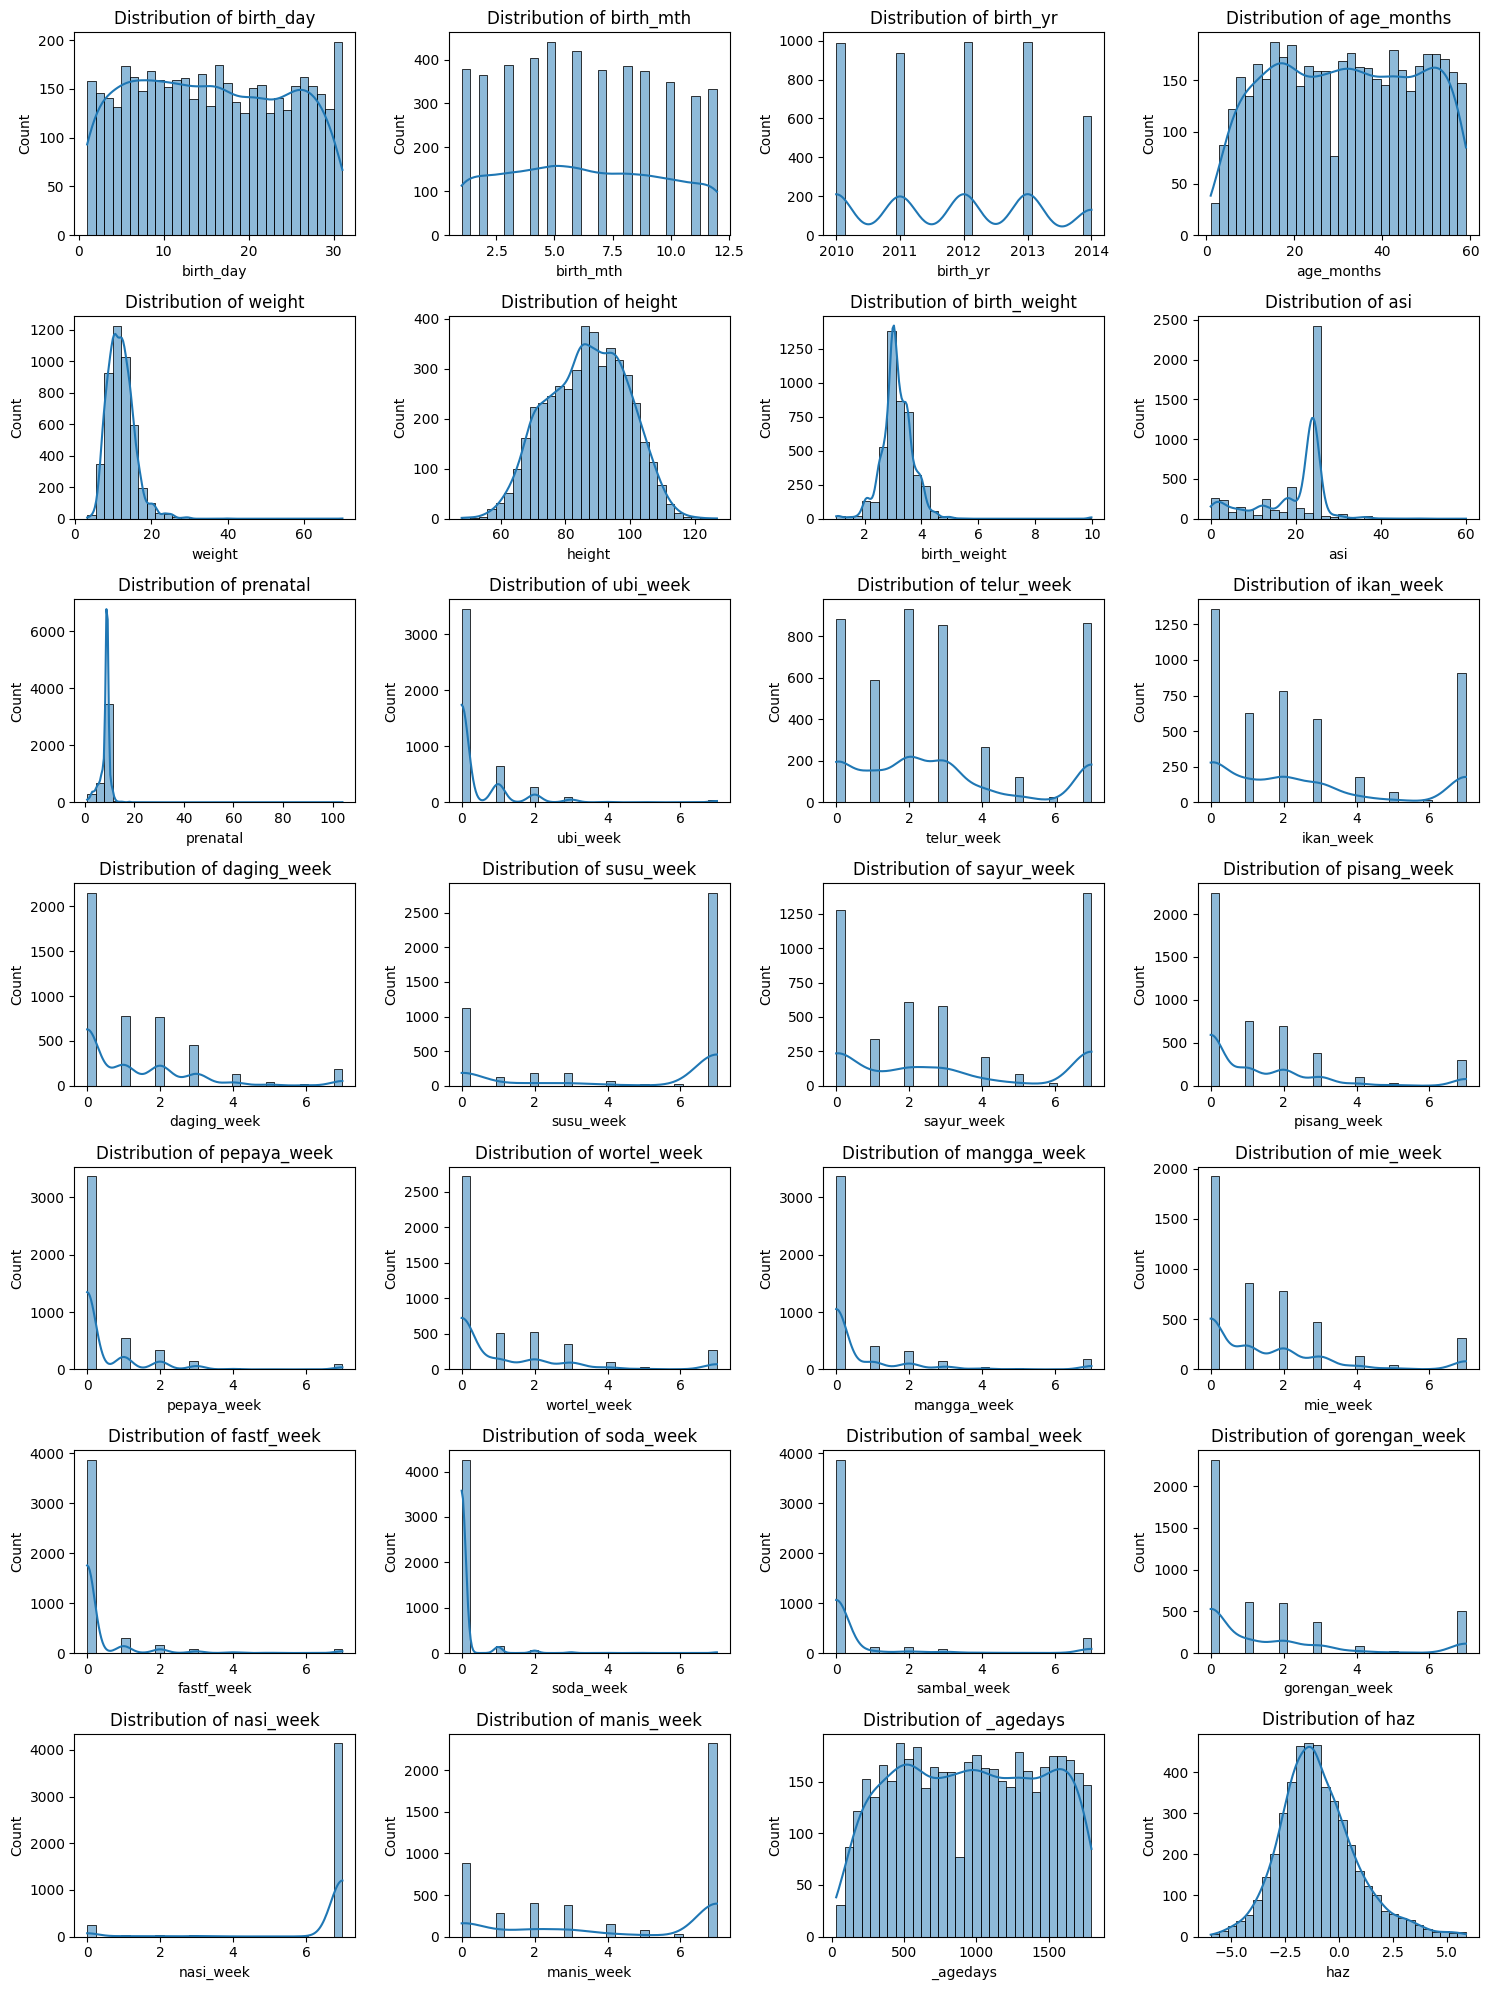

In [ ]:
# Distribusi data untuk kolom numerik
numeric_columns = stunting_df.select_dtypes(include='number').columns

plt.figure(figsize=(15, 20))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(7, 4, i)
    sns.histplot(stunting_df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

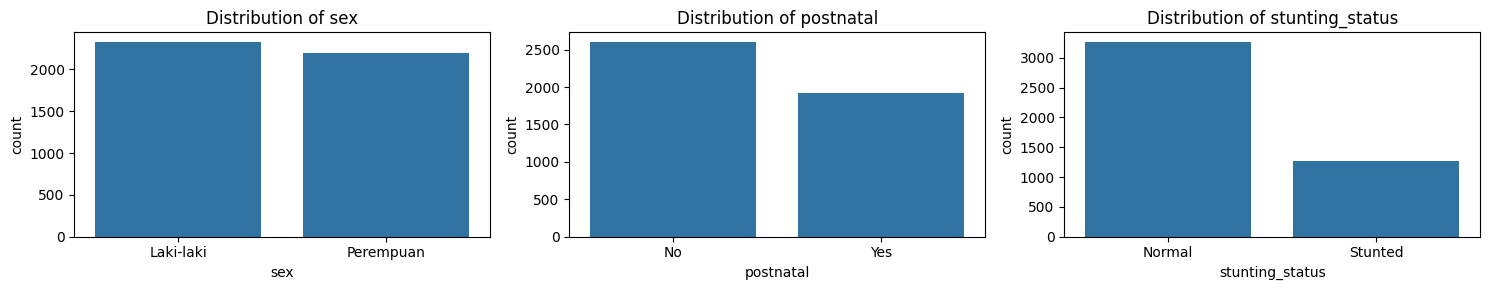

In [ ]:
# Visualisasi data variabel kategorik

category_columns = stunting_df.select_dtypes(include=['object', 'category']).columns

plt.figure(figsize=(15, 3))
for i, column in enumerate(category_columns, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=stunting_df[column])
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

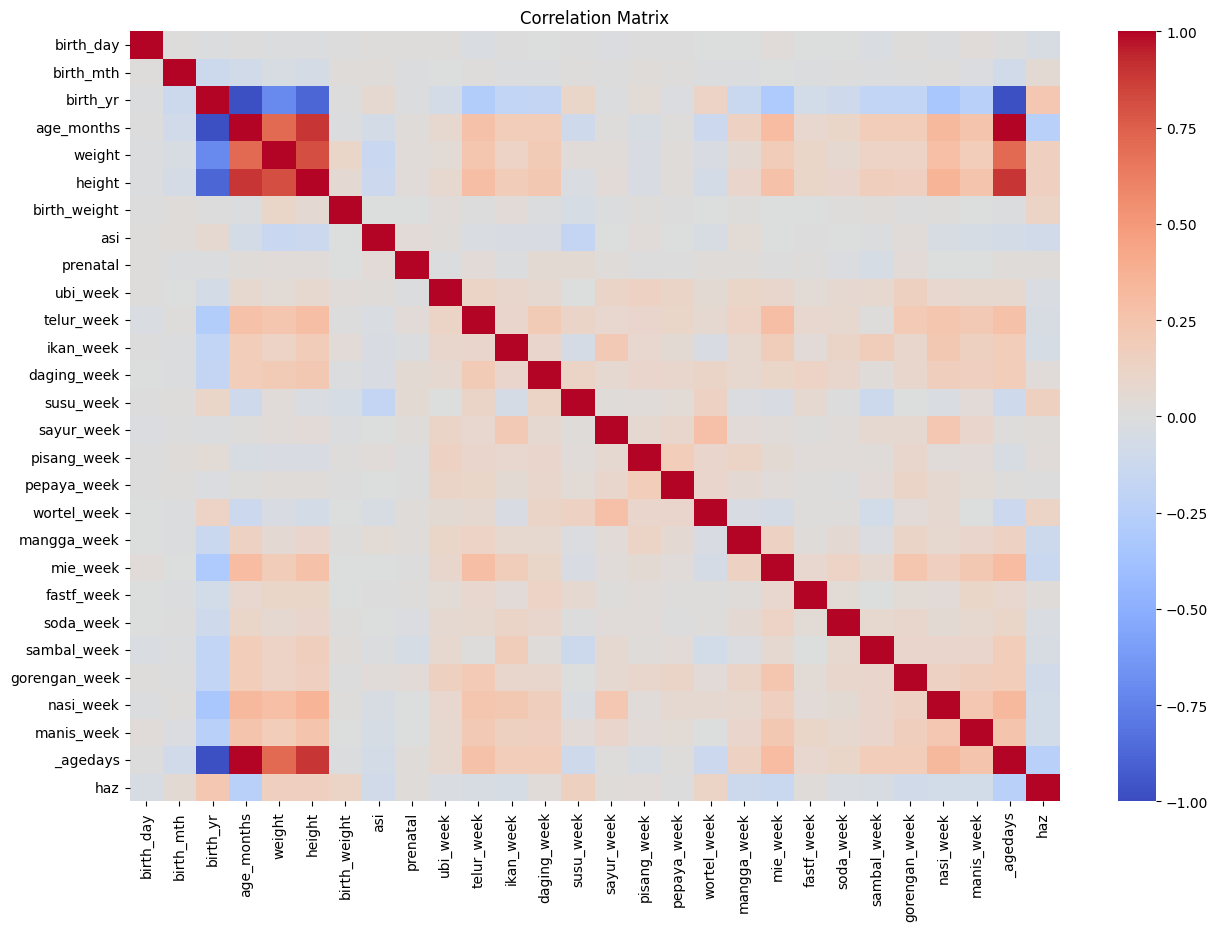

In [ ]:
# Korelasi antar variabel numerik dengan correlation matrix

plt.figure(figsize=(15, 10))
correlation_matrix = stunting_df.select_dtypes(include='number').corr()

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

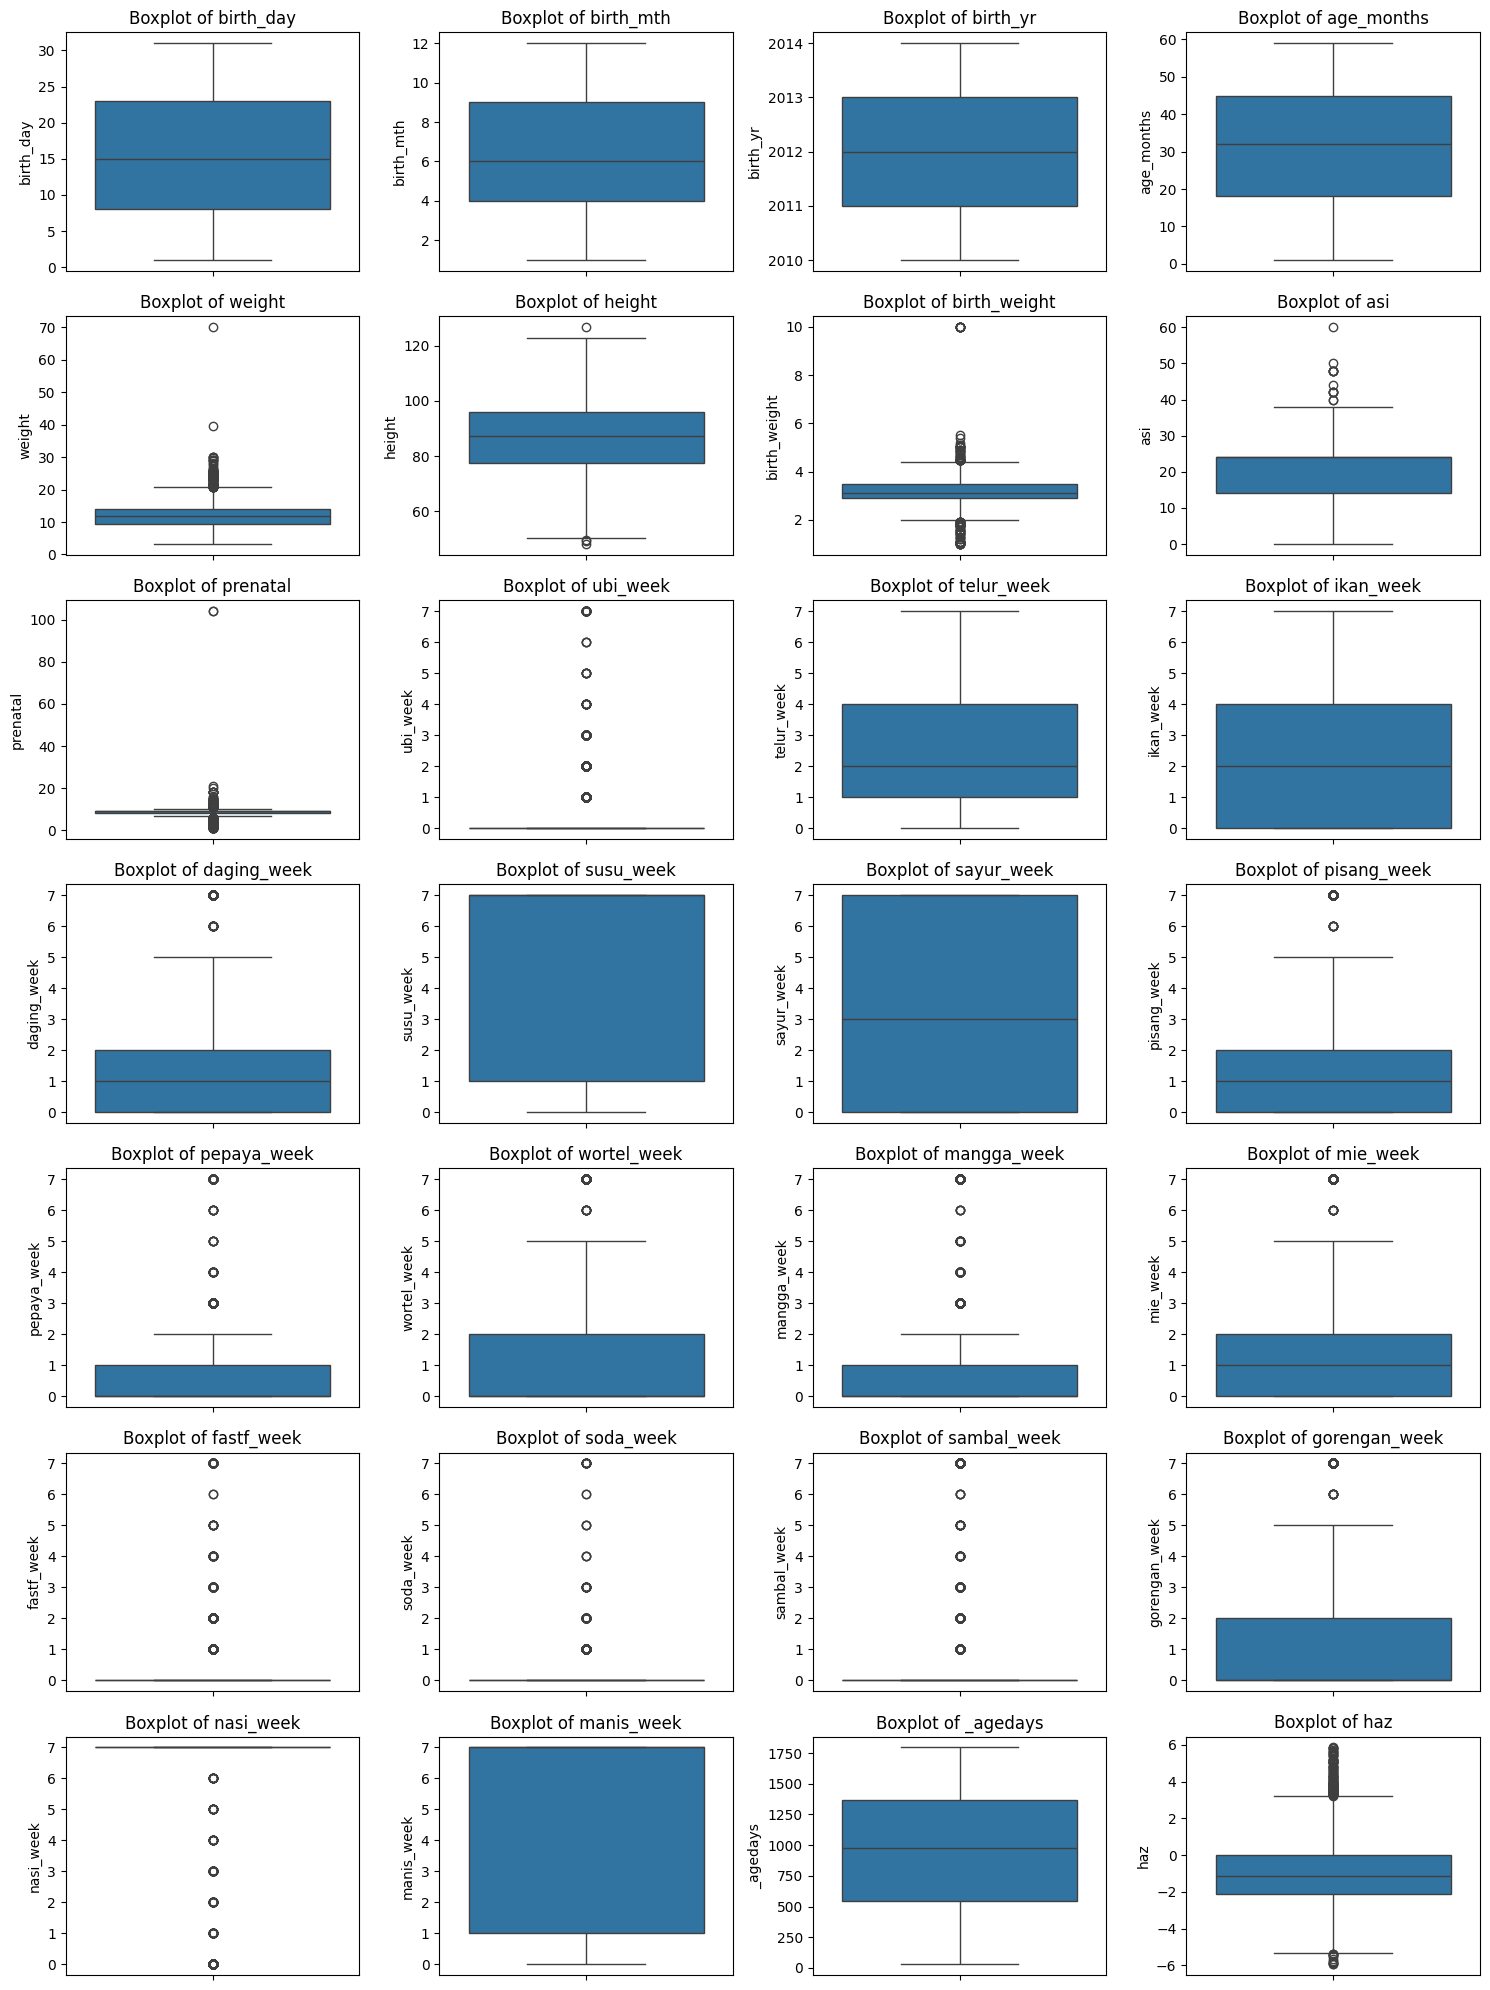

In [ ]:
# Mendeteksi Outlier

numeric_cols = stunting_df.select_dtypes(include='number').columns

plt.figure(figsize=(15, 20))
for i, column in enumerate(numeric_cols, 1):
    plt.subplot(7, 4, i)
    sns.boxplot(stunting_df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()